In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('train.csv', parse_dates=['Date'])

In [4]:
data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [5]:
data.tail()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0
17891,26382,NaN,Zambia,-15.4167,28.2833,2020-03-24,3.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              17892 non-null  int64         
 1   Province/State  8190 non-null   object        
 2   Country/Region  17892 non-null  object        
 3   Lat             17892 non-null  float64       
 4   Long            17892 non-null  float64       
 5   Date            17892 non-null  datetime64[ns]
 6   ConfirmedCases  17892 non-null  float64       
 7   Fatalities      17892 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [7]:
data.rename(columns={
    'Id':'id',
    "Province/State":'state',
    "Country/Region":'country',
    'Lat':'lat',
    'Long':'long',
    'Date':'date',
    'ConfirmedCases':'confirmed',
    'Fatalities':'deaths'
},inplace=True)

In [8]:
data.head()

,id,state,country,lat,long,date,confirmed,deaths
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [9]:
cleaned_data = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
cleaned_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [11]:
cleaned_data.rename(columns={
    'ObservationDate':'date',
    'Province/State':'state',
    'Country/Region':'country',
    'Lat':'lat',
    'Long':'long',
    'Date':'date',
    'Confirmed':'confirmed',
    'Deaths':'deaths',
    'Recovered':'recovered',
    'Active':'active',
    'WHO Region':'who_region',
    'Last Update':'last_update'
},inplace=True)
cleaned_data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,who_region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
# cases
cases = ['confirmed', 'deaths', 'recovered', 'active']

In [13]:
# active cases = confirmed - deaths - recovered
cleaned_data['active'] = cleaned_data['confirmed'] - cleaned_data['deaths'] - cleaned_data['recovered']

In [14]:
# replacing Mainland China with China
cleaned_data['country'] = cleaned_data['country'].replace('Mainland China','China')

In [15]:
# filling missing value
cleaned_data[['state']] = cleaned_data[['state']].fillna('')
cleaned_data[cases] = cleaned_data[cases].fillna(0)

In [16]:
cleaned_data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,who_region
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [17]:
data = cleaned_data

In [18]:
data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [19]:
data['date'].max()

Timestamp('2020-07-27 00:00:00')

In [20]:
data['date'].max() - data['date'].min()

Timedelta('187 days 00:00:00')

In [21]:
grouped = data.groupby('date')['date','confirmed','deaths'].sum().reset_index()
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       188 non-null    datetime64[ns]
 1   confirmed  188 non-null    int64         
 2   deaths     188 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.5 KB


c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [22]:
grouped.head()

,date,confirmed,deaths
0,2020-01-22,555,17
1,2020-01-23,654,18
2,2020-01-24,941,26
3,2020-01-25,1434,42
4,2020-01-26,2118,56


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='date', ylabel='deaths'>

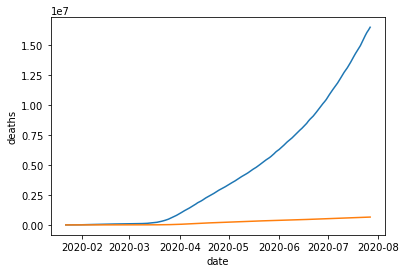

In [24]:
sns.lineplot(x='date',y='confirmed',data=grouped)
sns.lineplot(x='date',y='deaths',data=grouped)

In [25]:
import matplotlib.pyplot as plt

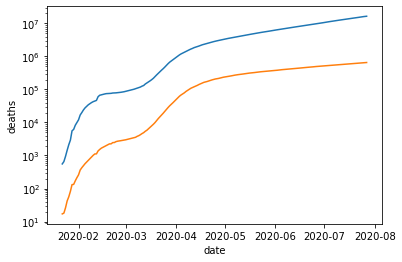

In [26]:
fig, ax = plt.subplots()
ax.set(yscale='log')
sns.lineplot(x='date',y='confirmed',data=grouped)
sns.lineplot(x='date',y='deaths',data=grouped)
plt.show()

In [27]:
data['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [28]:
grouped_china = data[data['country'] == 'China'].reset_index()
grouped_china_date = grouped_china.groupby('date')['date','confirmed','deaths'].sum().reset_index()

grouped_india = data[data['country'] == 'India'].reset_index()
grouped_india_date = grouped_india.groupby('date')['date','confirmed','deaths'].sum().reset_index()

grouped_us = data[data['country'] == 'US'].reset_index()
grouped_us_date = grouped_us.groupby('date')['date','confirmed','deaths'].sum().reset_index()

grouped_italy = data[data['country'] == 'Italy'].reset_index()
grouped_italy_date = grouped_italy.groupby('date')['date','confirmed','deaths'].sum().reset_index()

c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


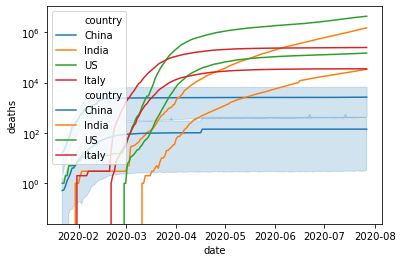

In [29]:
fig, ax = plt.subplots()
ax.set(yscale='log')
sns.lineplot(x='date',y='confirmed',hue='country',data=pd.concat([grouped_china,grouped_india,grouped_us,grouped_italy],ignore_index=True))
sns.lineplot(x='date',y='deaths',hue='country',data=pd.concat([grouped_china,grouped_india,grouped_us,grouped_italy],ignore_index=True))
fig.show()

In [30]:
data['state'] = data['state'].fillna('')
temp = data[[col for col in data.columns if col != 'state']]

latest = temp[temp['date'] == max(temp['date'])].reset_index()
latest_grouped = latest.groupby('country')['confirmed', 'deaths'].sum().reset_index()

c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [31]:
temp

,country,lat,long,date,confirmed,deaths,recovered,active,who_region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [32]:
latest_grouped[latest_grouped['country']=='US']

,country,confirmed,deaths
173,US,4290259,148011


In [33]:
latest_grouped.loc[173,'country'] = 'United States of America'

In [34]:
latest_grouped[latest_grouped['country']=='United States of America']

,country,confirmed,deaths
173,United States of America,4290259,148011


In [35]:
latest_grouped

,country,confirmed,deaths
0,Afghanistan,36263,1269
1,Albania,4880,144
2,Algeria,27973,1163
3,Andorra,907,52
4,Angola,950,41
...,...,...,...
182,West Bank and Gaza,10621,78
183,Western Sahara,10,1
184,Yemen,1691,483
185,Zambia,4552,140


In [36]:
latest_grouped[latest_grouped['country']=='US']

,country,confirmed,deaths


In [37]:
import geopandas as gpd

<AxesSubplot:>

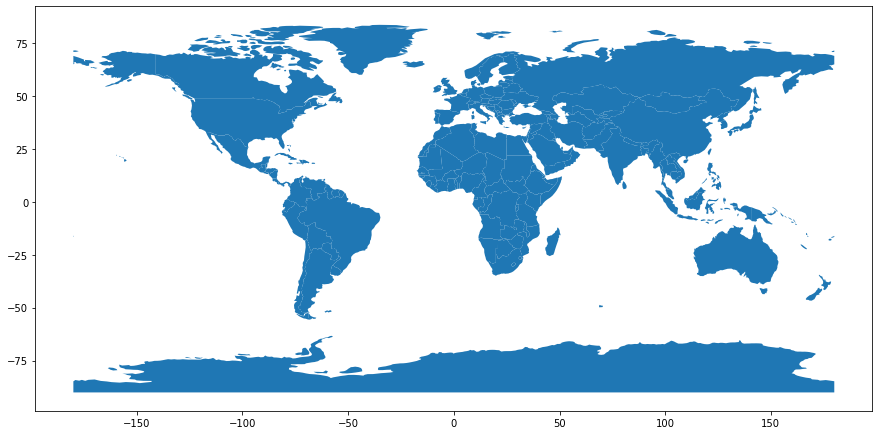

In [38]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, figsize=(15,15))
world.plot(ax=ax)

In [39]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [40]:
latest_grouped_merged = world.merge(latest_grouped, left_on='name',right_on='country')

<AxesSubplot:>

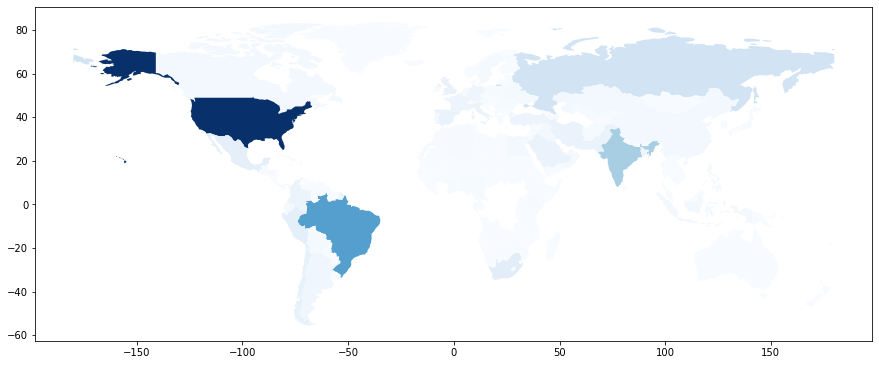

In [41]:
fig, ax = plt.subplots(1,figsize=(15,15))
latest_grouped_merged.plot(column='confirmed',ax=ax,cmap='Blues')

In [42]:
latest_grouped_merged[latest_grouped_merged['name']=='Italy']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,confirmed,deaths
122,62137802,Europe,Italy,ITA,2221000.0,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",Italy,246286,35112


In [43]:
latest_grouped_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     152 non-null    int64   
 1   continent   152 non-null    object  
 2   name        152 non-null    object  
 3   iso_a3      152 non-null    object  
 4   gdp_md_est  152 non-null    float64 
 5   geometry    152 non-null    geometry
 6   country     152 non-null    object  
 7   confirmed   152 non-null    int64   
 8   deaths      152 non-null    int64   
dtypes: float64(1), geometry(1), int64(3), object(4)
memory usage: 11.9+ KB


<AxesSubplot:>

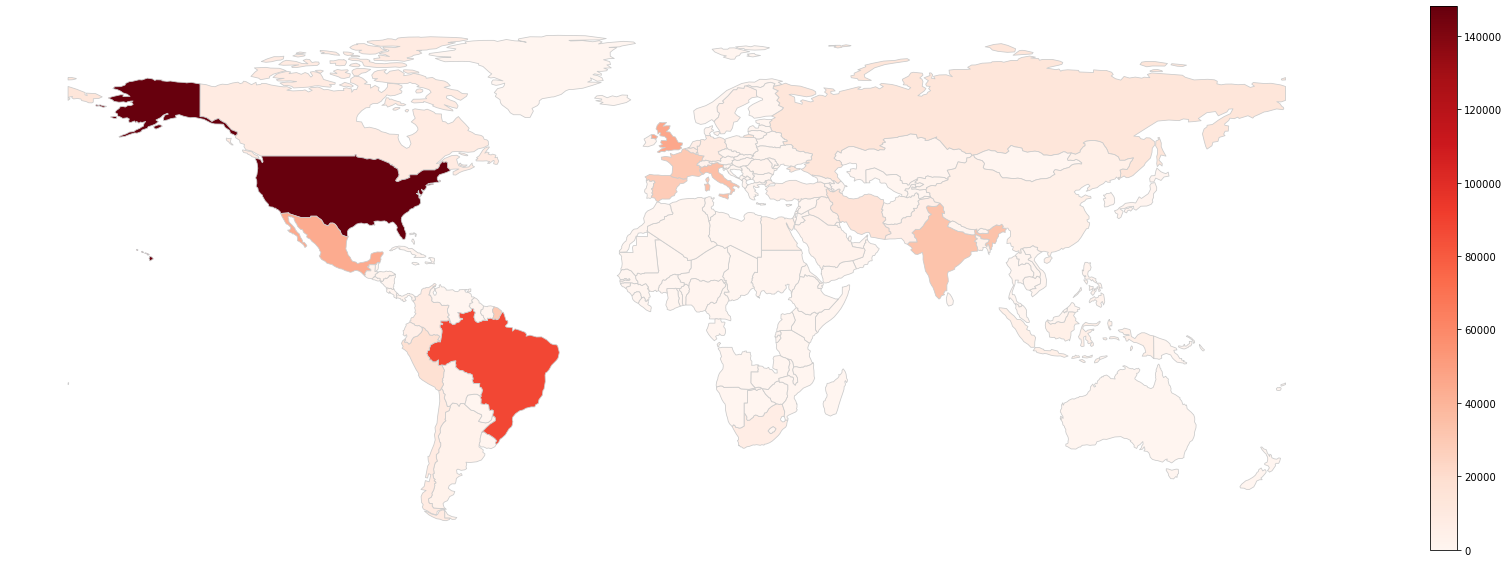

In [44]:
fig, ax = plt.subplots(1,figsize=(30,10))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Reds',norm=plt.Normalize(vmin=min(latest_grouped_merged['deaths']),vmax=max(latest_grouped_merged['deaths'])))
fig.colorbar(sm)
latest_grouped_merged.plot(column='deaths',ax=ax,cmap='Reds',linewidth=0.8,edgecolor='0.8')

<AxesSubplot:>

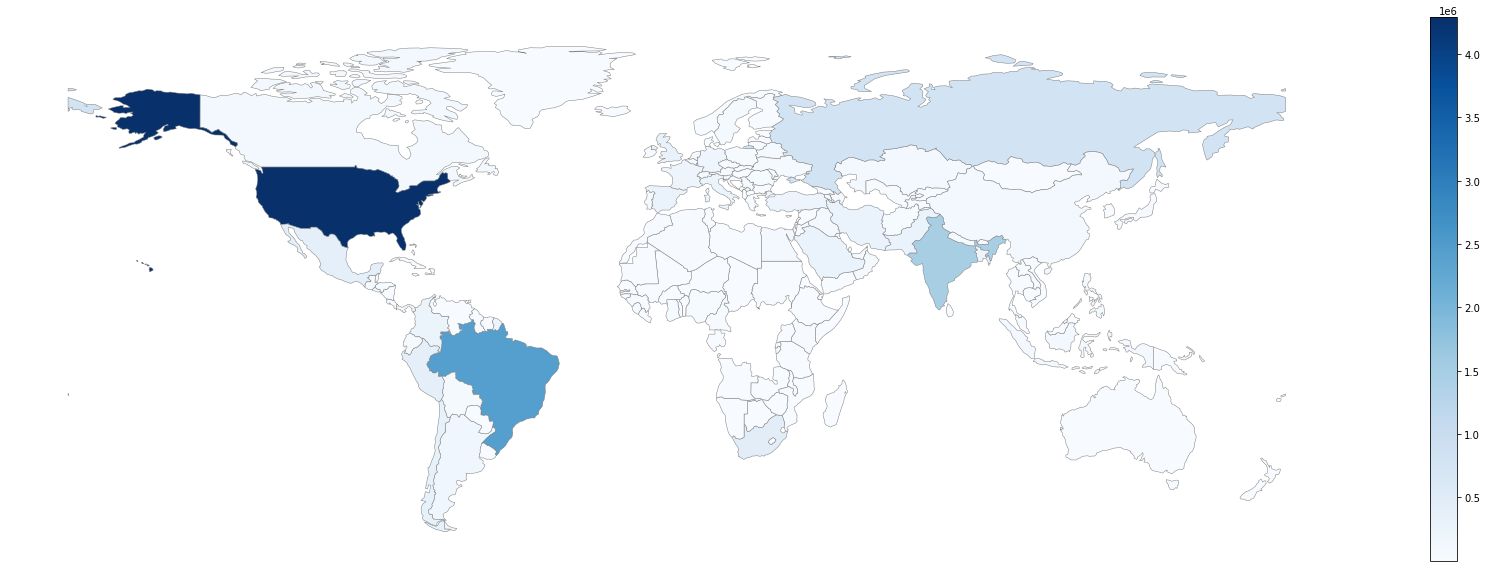

In [45]:
fig, ax = plt.subplots(1,figsize=(30,10))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=min(latest_grouped_merged['confirmed']),vmax=max(latest_grouped_merged['confirmed'])))
fig.colorbar(sm)
latest_grouped_merged.plot(column='confirmed',ax=ax,cmap='Blues',linewidth=0.5,edgecolor='0.5')

In [46]:
latest_grouped_merged_europe = latest_grouped_merged[latest_grouped_merged['continent']=='Europe']

<AxesSubplot:>

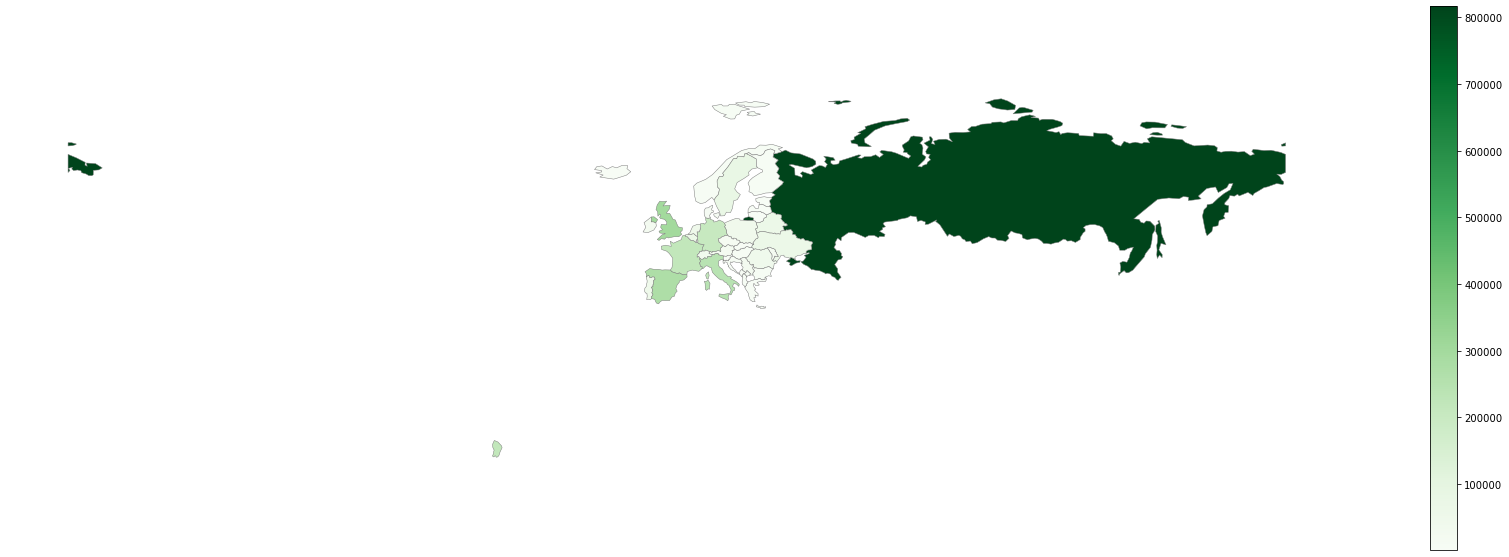

In [47]:
fig, ax = plt.subplots(1, figsize=(30,10))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Greens',norm=plt.Normalize(vmin=min(latest_grouped_merged_europe['confirmed']),vmax=max(latest_grouped_merged_europe['confirmed'])))
fig.colorbar(sm)
latest_grouped_merged_europe.plot(column='confirmed',ax=ax,cmap='Greens',linewidth=0.5,edgecolor='0.5')

In [48]:
latest_grouped_merged_europe['coords'] = latest_grouped_merged_europe['geometry'].apply(lambda x: x.representative_point().coords[:])
#latest_grouped_merged_europe['coords'] = [coords[0] for coords in latest_grouped_merged_europe['coords']]
#for idx, row in latest_grouped_merged_europe.iterrows():
#    plt.annotate(s=row['name'], xy=row['coords'],horizontalalignment='center')

c:\users\ssil\documents\research\venv37\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


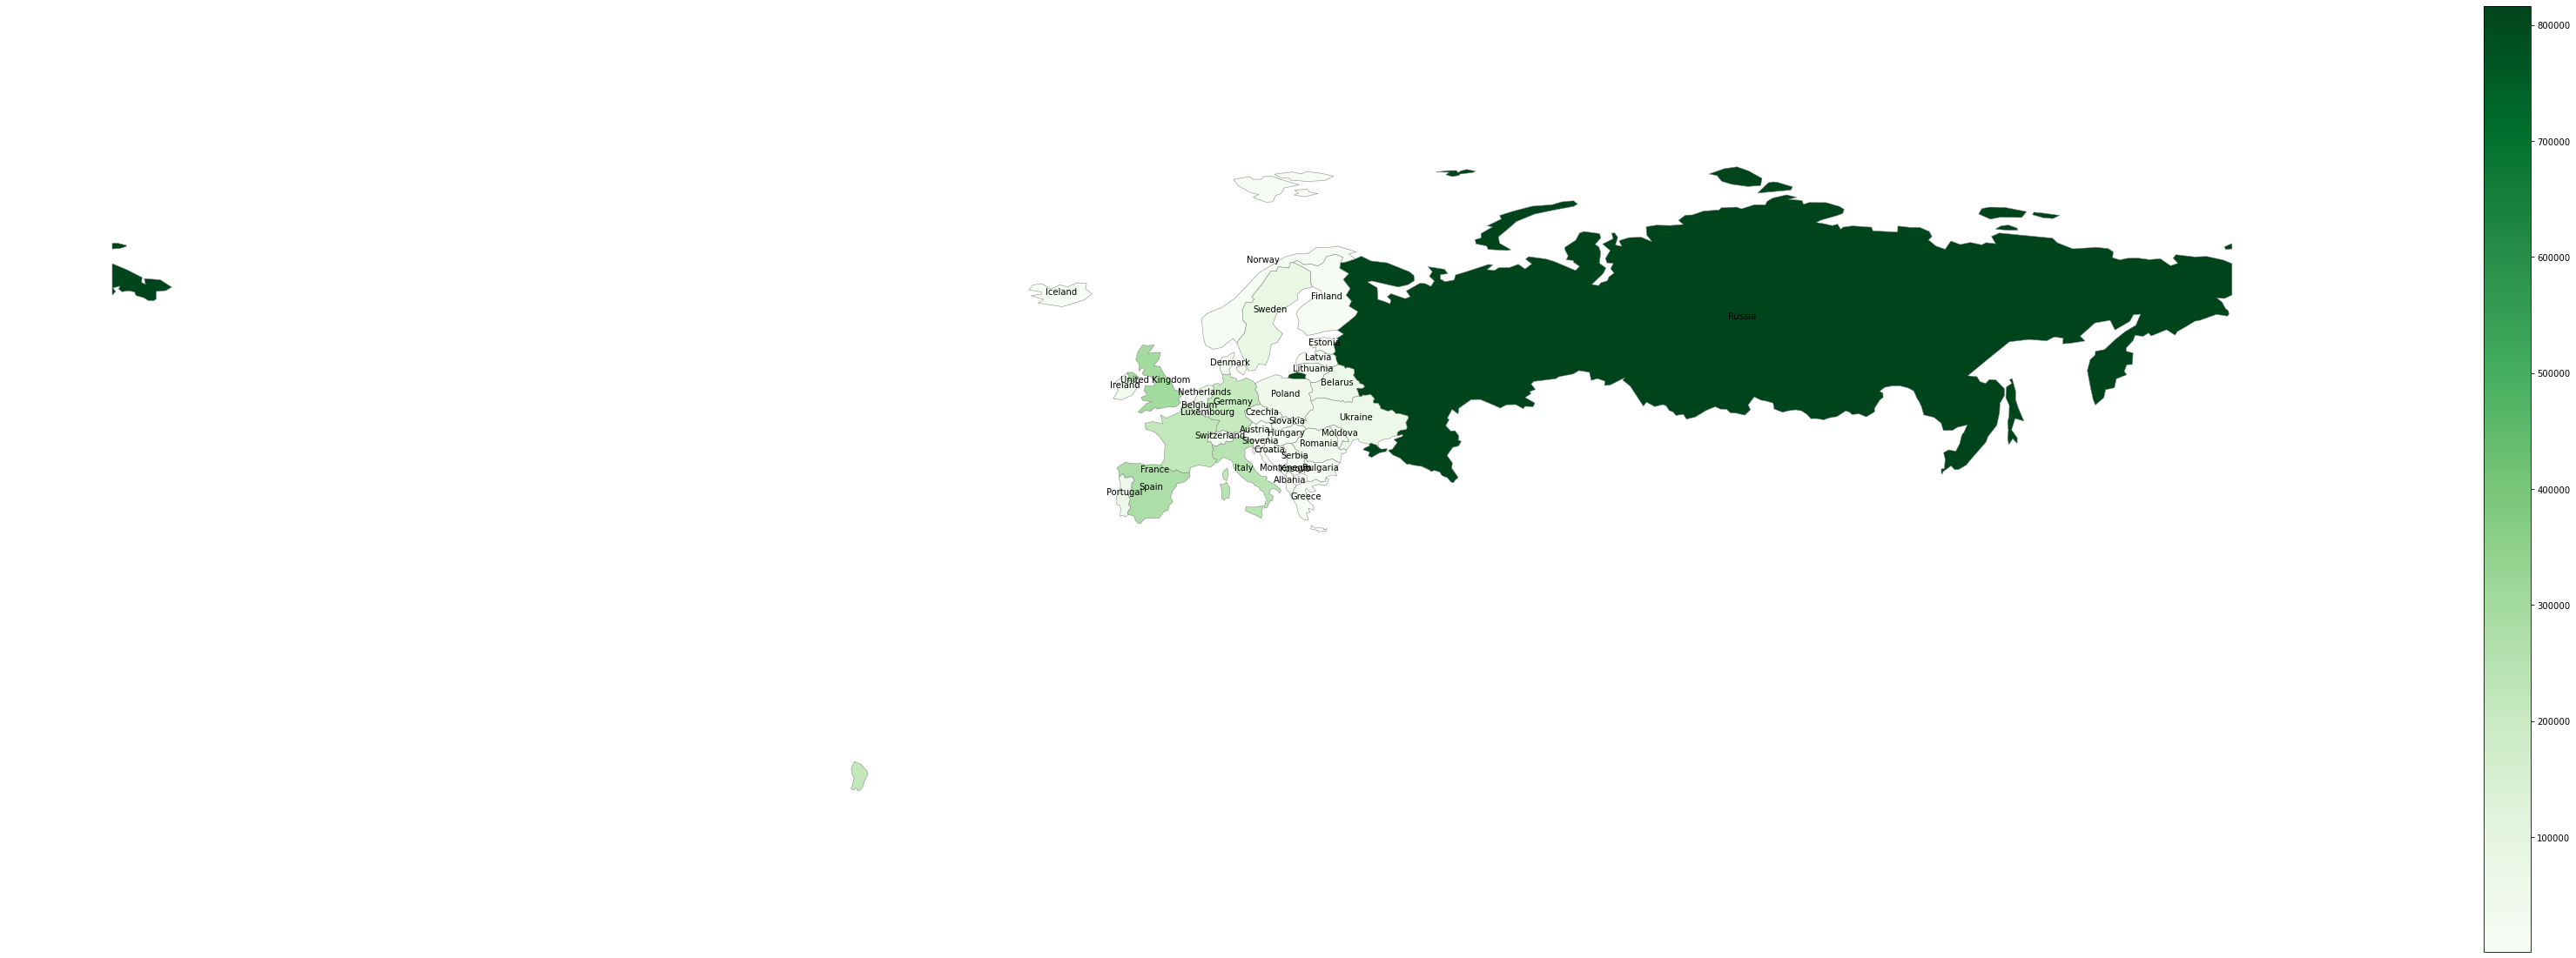

In [63]:
fig, ax = plt.subplots(1, figsize=(60,20))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Greens',norm=plt.Normalize(vmin=min(latest_grouped_merged_europe['confirmed']),vmax=max(latest_grouped_merged_europe['confirmed'])))
fig.colorbar(sm)
ax = latest_grouped_merged_europe.plot(column='confirmed',ax=ax,cmap='Greens',linewidth=0.5,edgecolor='0.5')
level = latest_grouped_merged_europe.apply(lambda x: ax.annotate(s=x.country, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [64]:
latest_grouped.head()

,country,confirmed,deaths
0,Afghanistan,36263,1269
1,Albania,4880,144
2,Algeria,27973,1163
3,Andorra,907,52
4,Angola,950,41


c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


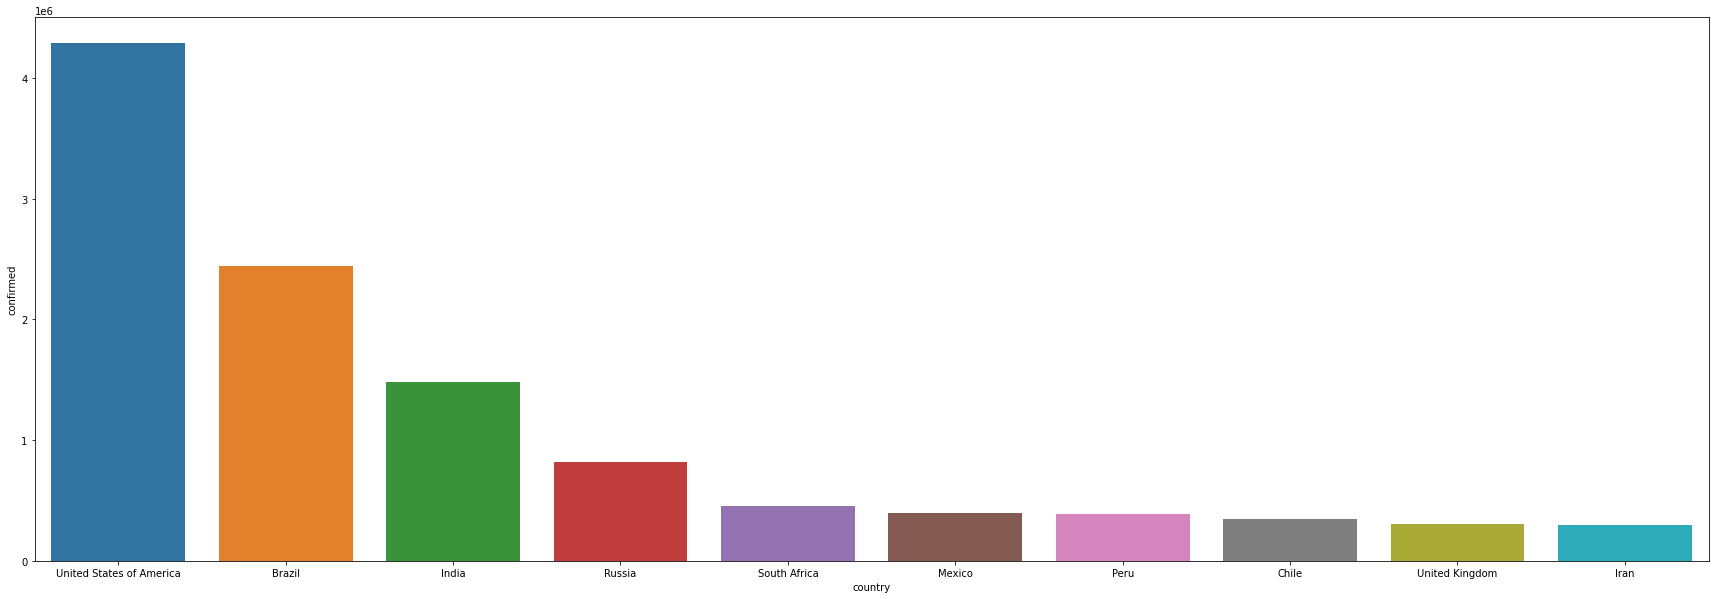

In [73]:
fig, ax = plt.subplots(1,figsize=(30,10))
sns.barplot(x='country',y='confirmed',data=latest_grouped.sort_values('confirmed', ascending=False)[:10])
fig.show()

c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


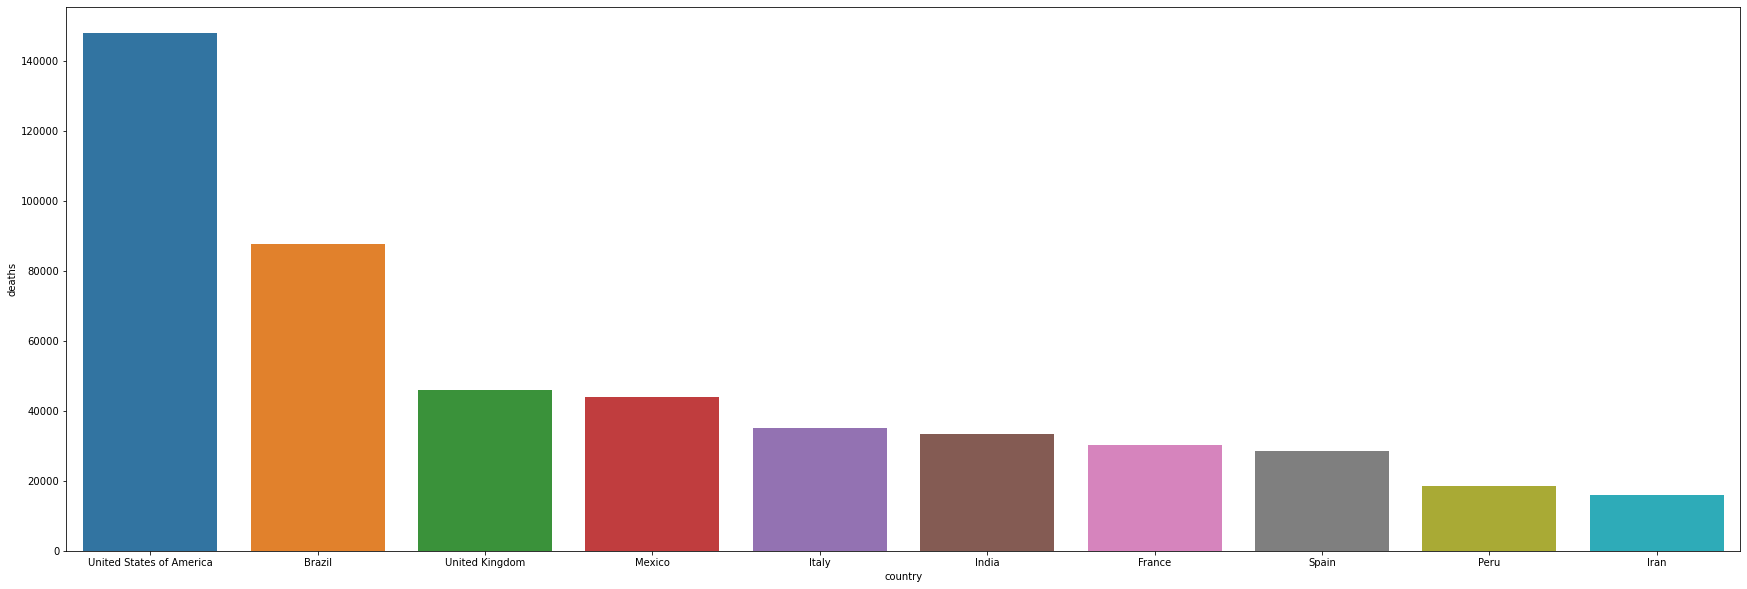

In [74]:
fig, ax = plt.subplots(1,figsize=(30,10))
sns.barplot(x='country',y='deaths',data=latest_grouped.sort_values('deaths', ascending=False)[:10])
fig.show()

In [81]:
europe = data[data['who_region']=='Europe']['country'].unique()
latest_grouped_europe = latest_grouped[latest_grouped['country'].isin(list(europe))]

c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


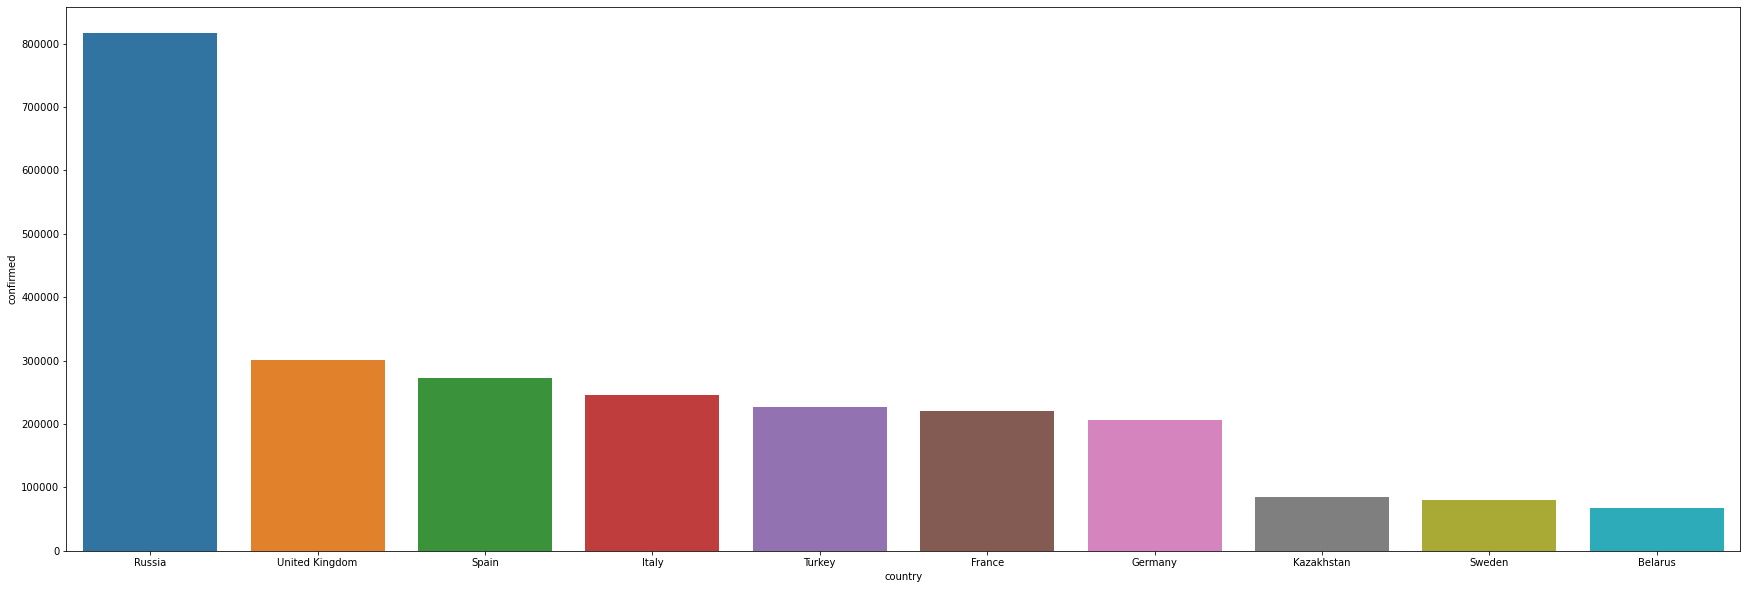

In [86]:
fig, ax = plt.subplots(1, figsize=(30,10))
sns.barplot(x='country',y='confirmed',data=latest_grouped_europe.sort_values('confirmed',ascending=False)[:10])
fig.show()

c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


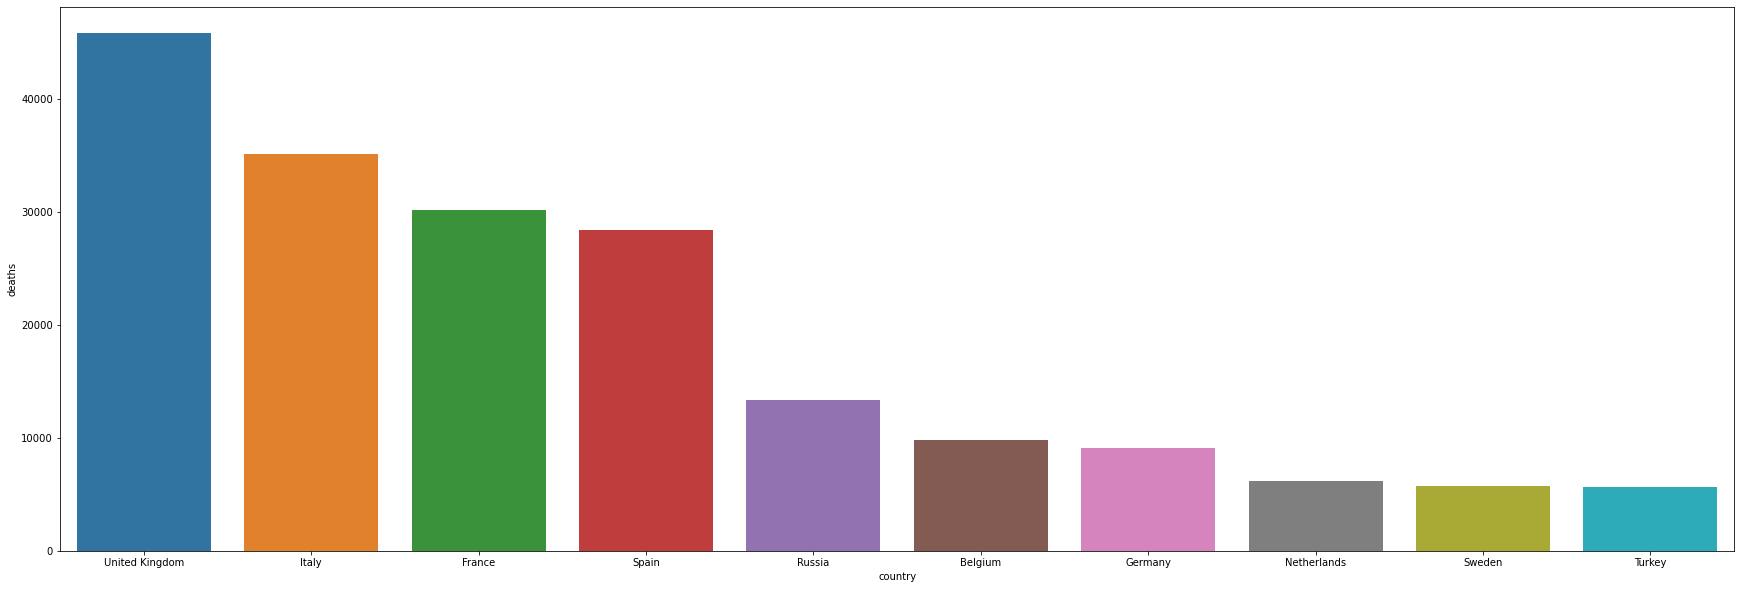

In [85]:
fig, ax = plt.subplots(1, figsize=(30,10))
sns.barplot(x='country',y='deaths',data=latest_grouped_europe.sort_values('deaths',ascending=False)[:10])
fig.show()

In [92]:
usa = cleaned_data[cleaned_data['country']=='US']
usa_latest = usa[usa['date']==max(usa['date'])]
usa_latest = usa_latest.groupby('state')['confirmed','deaths'].max().reset_index()
usa_latest

c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,state,confirmed,deaths
0,,4290259,148011


In [100]:
usa_data = pd.read_csv('usa_county_wise.csv',parse_dates=['Date'])
usa_latest = usa_data[usa_data['Date']==max(usa_data['Date'])]
usa_latest = usa_latest.groupby('Province_State')['Confirmed','Deaths'].max().reset_index()
usa_latest.head()

c:\users\ssil\documents\research\venv37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Province_State,Confirmed,Deaths
0,Alabama,10420,203
1,Alaska,1402,46
2,American Samoa,0,0
3,Arizona,109988,1807
4,Arkansas,5729,71


<AxesSubplot:xlabel='Province_State', ylabel='Confirmed'>

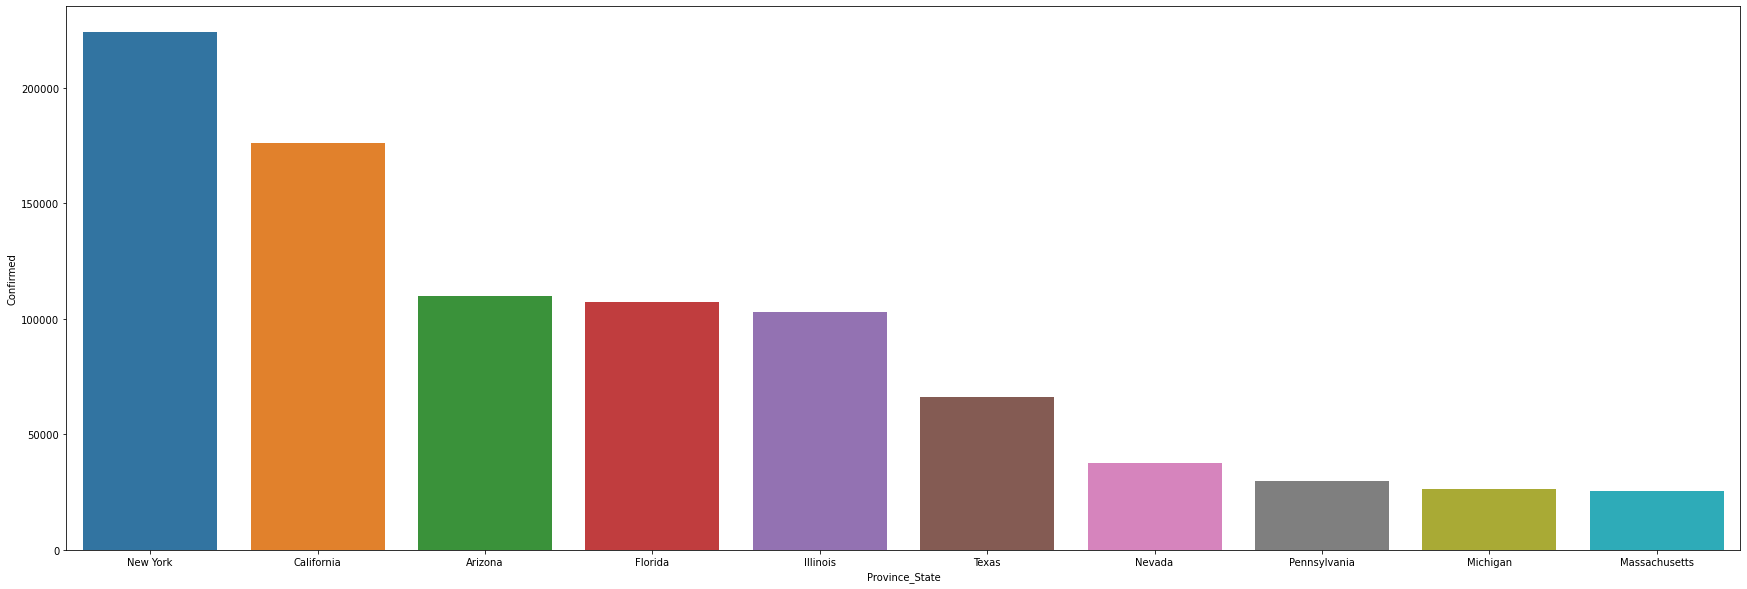

In [104]:
fig, ax = plt.subplots(1,figsize=(30,10))
sns.barplot(x='Province_State',y='Confirmed',data=usa_latest.sort_values('Confirmed', ascending=False)[:10])

<AxesSubplot:xlabel='Province_State', ylabel='Deaths'>

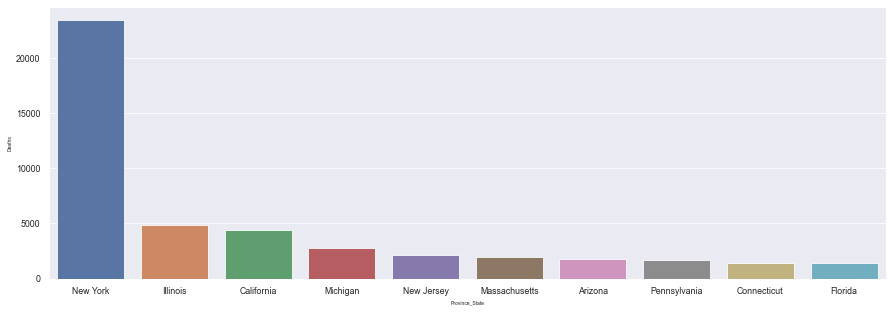

In [134]:
fig, ax = plt.subplots(1,figsize=(15,5))
sns.barplot(x='Province_State',y='Deaths',data=usa_latest.sort_values('Deaths', ascending=False)[:10])